************************************************************
- <b>Author:-</b> Sunil Sharanappa
- <b>Linked in:-</b> https://www.linkedin.com/in/sunil-sharanappa/
- <b>Github:-</b> https://github.com/dataisamazing
- <b>Kaggle:-</b>https://www.kaggle.com/sunilsharanappa
- <b>Ph:-</b> +91 9731034714
************************************************************

## <b><u>Section 01:-</u></b> Importing Libraries and Reading Data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [19]:
df=pd.read_csv("/content/diabetes2.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## <b><u>Section 02:-</u></b> EDA

Text(0.5, 0, 'Age')

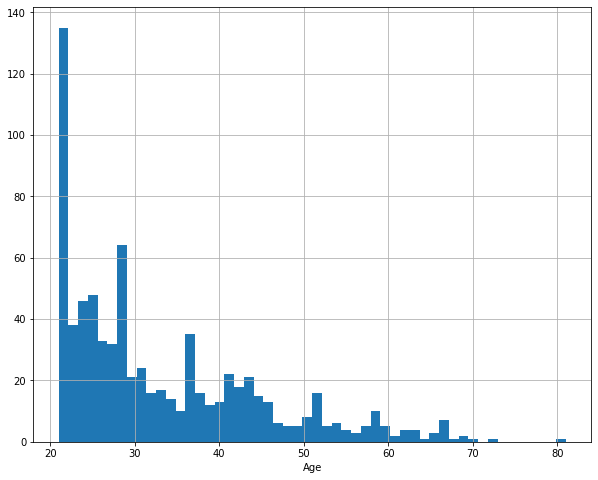

In [20]:
plt.figure(figsize=(10, 8))
df.Age.hist(bins=df.Age.nunique())
plt.xlabel('Age')

(9.5, -0.5)

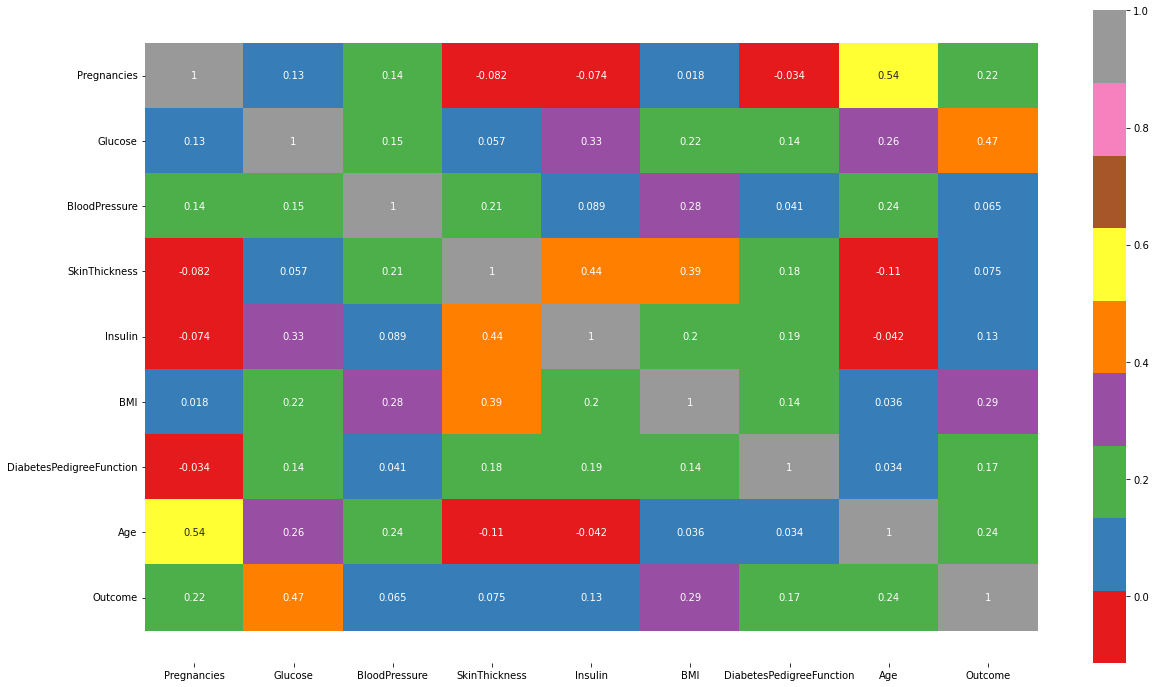

In [21]:
corr_matirx=df.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr_matirx, annot = True, cmap="Set1")
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

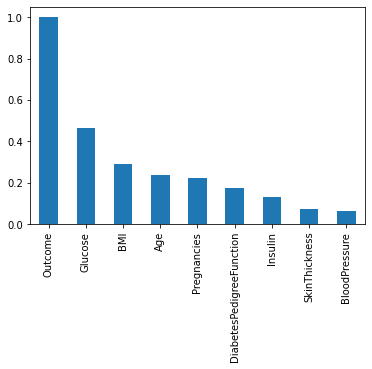

In [22]:
df.corr()['Outcome'].sort_values(ascending = False).plot(kind='bar')

In [44]:
df['Outcome'].value_counts()
transaction_classes[1]

268

In [46]:
Outcome_labels=df['Outcome'].value_counts()
No_Diabetic=round(Outcome_labels[0]/df['Outcome'].count()*100,2)
Diabetic=round(Outcome_labels[1]/df['Outcome'].count()*100, 2)
print("Percentage of people who are NOT Diabetic ",No_Diabetic,"%")
print("Percentage of people who are Diabetic",Diabetic,"%")     

Percentage of people who are NOT Diabetic  65.1 %
Percentage of people who are Diabetic 34.9 %


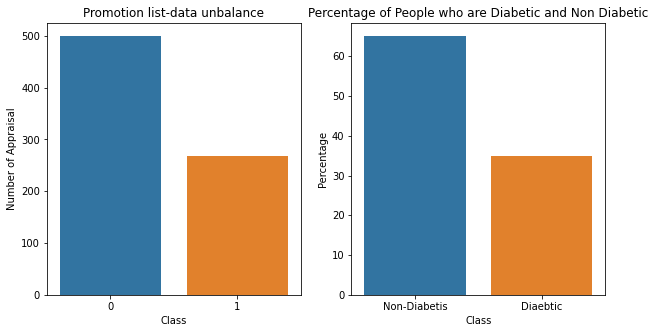

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(df["Outcome"])
plt.ylabel("Number of Appraisal")
plt.xlabel("Class")
plt.title("Promotion list-data unbalance")

plt.subplot(1,2,2)
promoted_percentage = {'Class':['Non-Diabetis', 'Diaebtic'], 'Percentage':[Not_promoted, promoted]} 
df_promoted_percentage = pd.DataFrame(promoted_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_promoted_percentage)
plt.title('Percentage of People who are Diabetic and Non Diabetic')
plt.show()

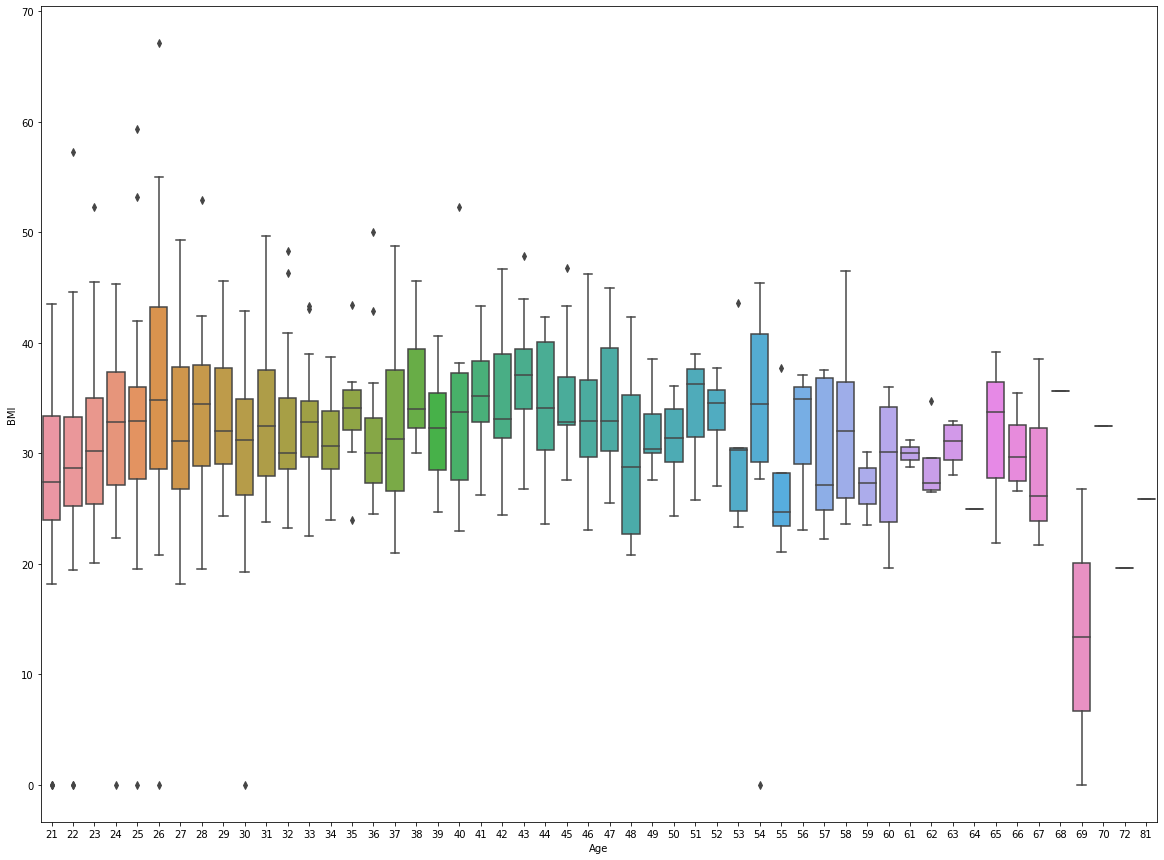

In [25]:
plt.subplots(figsize=(20,15))
sns.boxplot(x='Age', y='BMI', data=df)

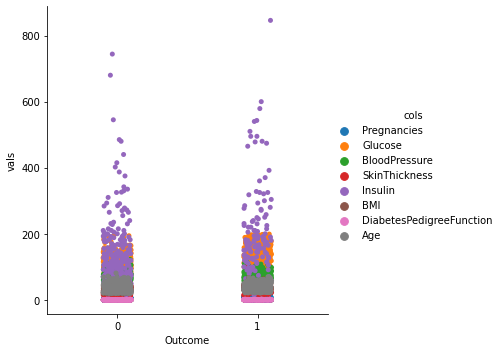

In [27]:
df01 = df.melt('Outcome', var_name='cols',  value_name='vals')
g = sns.catplot(x="Outcome", y="vals", hue='cols', data=df01, kind='strip')


## <b><u>Section 03:-</u></b> Splitting Train and Test

In [28]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


## <b><u>Section 04:-</u></b> Spot Check Algorithm on Train Data

In [49]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.765653 (0.041500)
LDA: 0.767187 (0.034499)
KNN: 0.716684 (0.032816)
Decision Tree: 0.690772 (0.049907)
NB: 0.744474 (0.039197)
XGB: 0.767266 (0.052618)


## <b><u>Section 05:-</u></b> Finding the Best C parameter for Logistic Regression.

In [50]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.830528297308013
Best hyperparameters:  {'C': 100}


LogisticRegression(C=100)

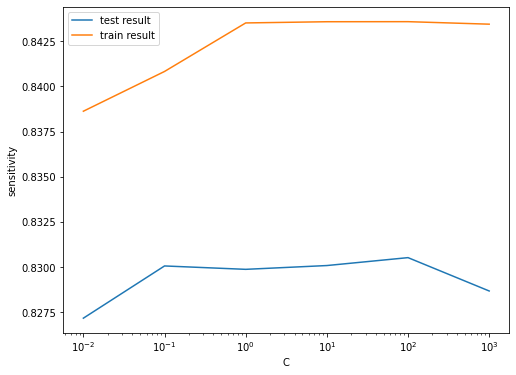

In [51]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=100)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

## <b><u>Section 06:-</u></b> Evaluating the Train and Test Results.

In [32]:
# Creating function to show ROC-AUC score, f1 score and classification report

def show_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)
show_scores(y_train, y_train_pred)

F1 Score: 64.04%
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       401
           1       0.73      0.57      0.64       213

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614



In [33]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(x_test)
show_scores(y_test, y_train_pred)

F1 Score: 67.89%
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## <b><u>Section 07:-</u></b> Plotting ROC-AUC Curve for Training and Test.

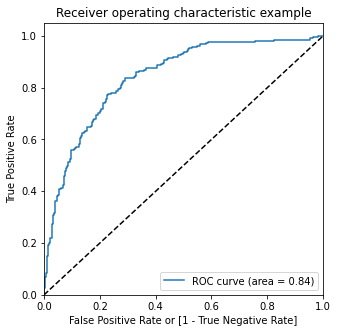

In [34]:
from sklearn import metrics
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

    # Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

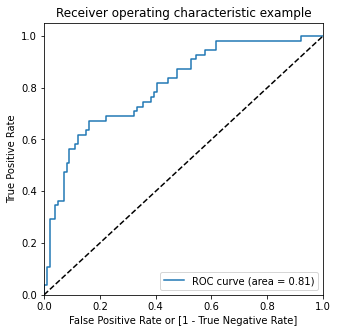

In [35]:
    # Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(x_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_train_pred_proba)

## <b><u>Section 08:-</u></b> Plotting Confusion Matrix

Text(69.0, 0.5, 'Truth')

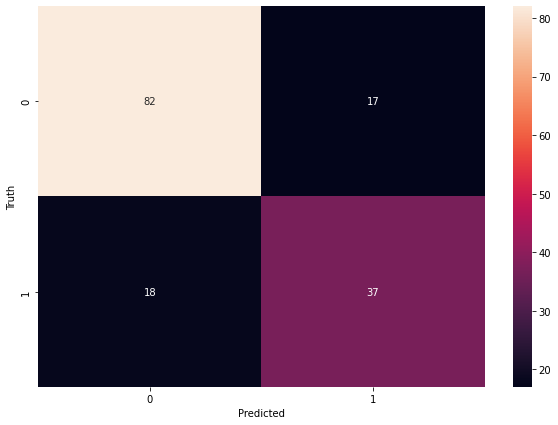

In [36]:
y_predicted = log_reg_imb_model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')